In [1]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import copy
import math
# pytorch imports
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR

In [16]:
size=100
ez=np.zeros((size,size))
hx=np.zeros((size,size))
hy=np.zeros((size,size))

In [15]:

def fieldupdate3(T=10,size=100,E=ez,Hx=hx,Hy=hy):
    imp0=377
    E_history=[]
    Hx_history=[]
    Hy_history=[]
    test=[]
    for t in range(T):
        for i in range(size):
            for j in range(size-1):
                Hx[i][j]=Hx[i][j]+(E[i][j+1]-E[i][j])/imp0/2

        for i in range(size-1):
            for j in range(size):
                
                Hy[i][j]=Hy[i][j]+(E[i+1][j]-E[i][j])/imp0/2
                
                
        for i in range(size-1):
            for j in range(size-1):
                E[i+1][j+1]=E[i+1][j+1]+(Hx[i+1][j+1]+Hy[i+1][j+1]-Hx[i+1][j]-Hy[i][j+1])*imp0/2

        E[int(size/2)][int(size/2)]+=math.sin(0.1*t)
        #E[int(size/2)][int(size/2)]+=math.exp(-(t+1-0.3*size)*(t+1-0.3*size)/100)
        test.append(E[int(0.5*size)])
        E_history.append(E.copy())
        Hx_history.append(Hx.copy())
        Hy_history.append(Hy.copy())
    with open("E field history.txt", 'w') as f:
        for member in E_history:
            f.write(str(member) + '\n')
    with open("Hx field history.txt", 'w') as f:
        for member in Hx_history:
            f.write(str(member) + '\n')
    with open("Hy field history.txt", 'w') as f:
        for member in Hy_history:
            f.write(str(member) + '\n')
    E_history=np.array(E_history)
    return E,Hx,Hy,test, E_history


In [9]:

#ez[50]=1

In [17]:
EZ,HX,HY,test,E_history=fieldupdate3(100,size,ez,hx,hy)
print(type(E_history))

E_new=E_history.copy().reshape(-1)
print(E_new.shape)

#print(test)

<class 'numpy.ndarray'>
(1000000,)


In [18]:
for i in range(20):
    
    print(E_history[i][50][50])

0.0
0.09983341664682815
0.19866933079506122
0.2206451441762185
0.19049963588894053
0.17248979242662787
0.18395443067806705
0.19865072275451778
0.1996629339611038
0.19132550787324099
0.1764454759346652
0.15446011610533883
0.13464533757176833
0.12634685722097727
0.1207036028856101
0.10153616245485331
0.07003909669594632
0.04172846534458441
0.02295627497754804
0.006209459196588218


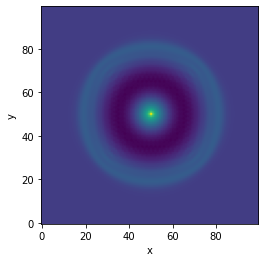

In [23]:

plt.xlabel('x')
plt.ylabel('y')
plt.imshow(E_history[70],origin='lower')

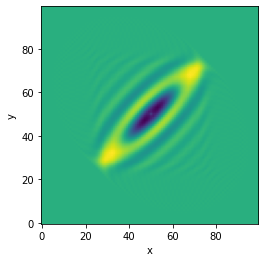

In [7]:

plt.xlabel('x')
plt.ylabel('y')
plt.imshow(E_history[50],origin='lower')

In [51]:

X=[]
Y=[]
for i in range(100):
    for j in range(100):
        X.append(i)
        Y.append(j)
X=np.array(X)
Y=np.array(Y)
#print(test)

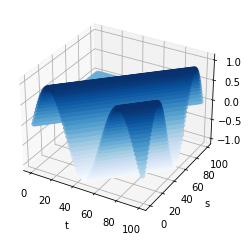

In [58]:
ax = plt.axes(projection='3d')

# Data for three-dimensional scattered points
zdata = E_new
xdata = X
ydata = Y
plt.xlabel('s')
plt.ylabel('t')
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Blues');



In [56]:
print(E_history)

[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.09983342  0.          0.         ...  0.          0.
   0.        ]
 [ 0.19866933  0.09983342  0.         ...  0.          0.
   0.        ]
 ...
 [-0.27176063 -0.17432678 -0.07515112 ...  0.          0.
   0.        ]
 [-0.36647913 -0.27176063 -0.17432678 ...  0.09983342  0.
   0.        ]
 [-0.45753589 -0.36647913 -0.27176063 ...  0.19866933  0.09983342
   0.        ]]


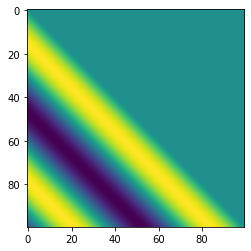

In [57]:
plt.imshow(E_history)

In [ ]:

plt.plot(test)
plt.xlabel('Time Step')
plt.ylabel('EZ(50)(mV)')
plt.show()

In [ ]:

#plot for final states
plt.plot(EZ)
plt.xlabel('Spetial Step')
plt.ylabel('EZ(mV)')
plt.show()
plt.plot(HY)
plt.xlabel('Spetial Step')
plt.ylabel('HY(mH)')
#plt.ylabel('some numbers')
plt.show()# 

In [ ]:
ax = plt.axes(projection='3d')

# Data for three-dimensional scattered points
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.zeros(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

In [ ]:
plt.plot(E_history[])
plt.xlabel('Spetial Step')
plt.ylabel('EZ(mV)')
plt.show()

In [ ]:
file= open("E field history.txt", "r")
data=file.read()
print((data))

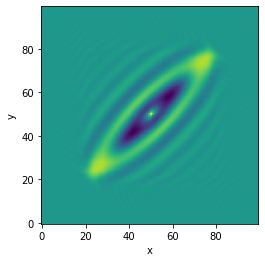